In [9]:
import os
import sys
try:
    if changed:
        raise Exception("changed")
except NameError:
    changed = False
    sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
from data.generate_synthetic_data import generate_synthetic_sparse_signal, generate_kernel_h

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


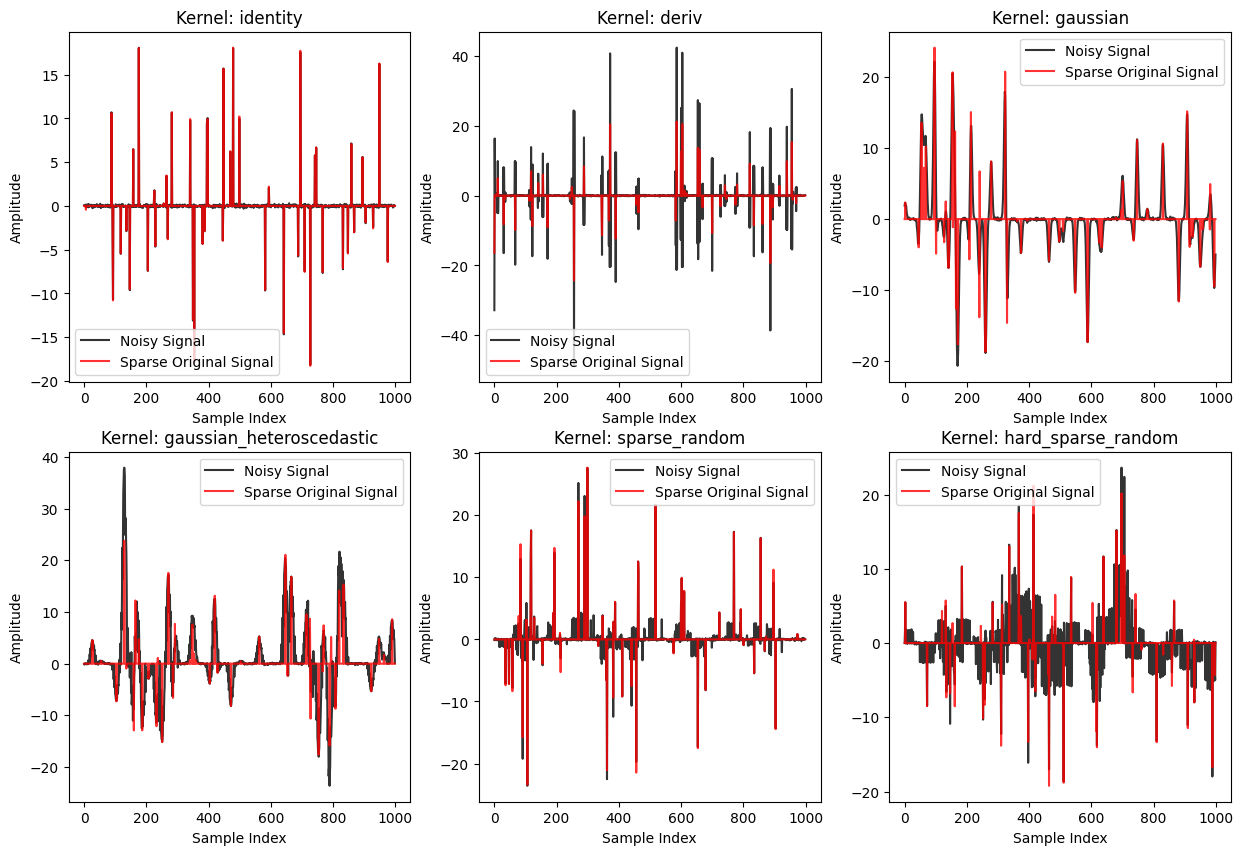

In [10]:
kernel_types = ["identity", "deriv", "gaussian", "gaussian_heteroscedastic", "sparse_random", "hard_sparse_random"]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, kernel_type in enumerate(kernel_types):
    h = generate_kernel_h(length=50, type=kernel_type)
    degraded_signal, signal, H = generate_synthetic_sparse_signal(length=1000, sparsity=0.05, noise_level=0.1, h=h)

    # Plot the signal
    m = len(h) // 2
    axs[i//3, i%3].plot(degraded_signal[m:-m], label="Noisy Signal", alpha=0.8, color ="black")
    axs[i//3, i%3].plot(signal, label="Sparse Original Signal", alpha=0.8, color = "red")
    axs[i//3, i%3].set_title("Kernel: {}".format(kernel_type))
    axs[i//3, i%3].set_xlabel("Sample Index")
    axs[i//3, i%3].set_ylabel("Amplitude")
    axs[i//3, i%3].legend()
    
plt.show()

In [11]:
# parameters of signal 
length = 2000
sparsity = [0.05, 0.1, 0.2]
noise_level = [0.05, 0.1, 0.5]
kernel_types = ["identity", "deriv", "gaussian", "gaussian_heteroscedastic", "sparse_random", "hard_sparse_random"]

# number of samples to generate for each parameter combination
num_samples = 100

# parametes combinations
parameters = [(s, n, k) for s in sparsity for n in noise_level for k in kernel_types]
print(len(parameters))





54


In [12]:
# generate original_signal, noisy_signal, H for each parameter combination
# train = {
#     "original_signals": [],
#     "noisy_signals": [],
#     "Hs": []
# }
# validation = {
#     "original_signals": [],
#     "noisy_signals": [],
#     "Hs": []
# }
# test = {
#     "original_signals": [],
#     "noisy_signals": [],
#     "Hs": []
# }

# for s, n, k in parameters:
#     for i in range(num_samples):
#         if i < num_samples * 0.6:
#             data = train
#         elif i < num_samples * 0.8:
#             data = validation
#         else:
#             data = test
#         h = generate_kernel_h(length=50, type=k)
#         degraded_signal, signal, H = generate_synthetic_sparse_signal(length=length, sparsity=s, noise_level=n, h=h)
#         data["original_signals"].append(signal)
#         data["noisy_signals"].append(degraded_signal)
#         data["Hs"].append(H)

In [13]:
import shutil

datasetRoot = os.path.join("../data", "synthetic")

try:
    shutil.rmtree(datasetRoot)
except:
    pass
os.makedirs(datasetRoot)

# Create training, validation and test folders
# Training
training_path = os.path.join(datasetRoot, "training")
os.makedirs(training_path)
training_path_Groundtruth = os.path.join(training_path, "Groundtruth")
os.makedirs(training_path_Groundtruth)
training_path_Degraded2000 = os.path.join(training_path, "Degraded")
os.makedirs(training_path_Degraded2000)
training_path_H = os.path.join(training_path, "H")
os.makedirs(training_path_H)
# Validation
validation_path = os.path.join(datasetRoot, "validation")
os.makedirs(validation_path)
validation_path_Groundtruth = os.path.join(validation_path, "Groundtruth")
os.makedirs(validation_path_Groundtruth)
validation_path_Degraded2000 = os.path.join(validation_path, "Degraded")
os.makedirs(validation_path_Degraded2000)
validation_path_H = os.path.join(validation_path, "H")
os.makedirs(validation_path_H)
# Test
test_path = os.path.join(datasetRoot, "test")
os.makedirs(test_path)
test_path_Groundtruth = os.path.join(test_path, "Groundtruth")
os.makedirs(test_path_Groundtruth)
test_path_Degraded2000 = os.path.join(test_path, "Degraded")
os.makedirs(test_path_Degraded2000)
test_path_H = os.path.join(test_path, "H")
os.makedirs(test_path_H, exist_ok=True)


In [14]:
# parameters of signal 
length = 2000
sparsity = [0.01, 0.05, 0.1]
noise_level = [0.1, 0.5]
kernel_types = ["identity", ]
                # "deriv", "gaussian"]
# kernel_types = ["identity", "deriv", "gaussian", "gaussian_heteroscedastic", "sparse_random", "hard_sparse_random"]

# number of samples to generate for each parameter combination
num_samples = 50

# parametes combinations
parameters = [(s, n, k) for s in sparsity for n in noise_level for k in kernel_types]
print(len(parameters))

# generate original_signal, noisy_signal, H for each parameter combination
count = 0
for s, n, k in parameters:
    print(s, n, k)
    print(count, "th out of", len(parameters))
    for i in range(num_samples):
        count += 1
        if i < num_samples * 0.6:
            path = training_path
        elif i < num_samples * 0.8:
            path = validation_path
        else:
            path = test_path
        h = generate_kernel_h(length=50, type=k)
        degraded_signal, signal, H = generate_synthetic_sparse_signal(length=length, sparsity=s, noise_level=n, h=h)
        np.save(os.path.join(path, "Groundtruth", "x_Gr_tr_{}_{}_{}_{}.npy".format(s, n, k, count)), signal)
        np.save(os.path.join(path, "Degraded", "x_De_tr_{}_{}_{}_{}.npy".format(s, n, k, count)), degraded_signal)
        np.save(os.path.join(path, "H", "H_tr_{}_{}_{}_{}.npy".format(s, n, k, count)), H)

4
0.01 0.05 identity
0 th out of 4
0.01 0.1 identity
100 th out of 4
0.05 0.05 identity
200 th out of 4
0.05 0.1 identity
300 th out of 4


In [15]:
# # granular test data set for each parameter combination
# # parameters of signal
# length = 2000
# sparsity = [0.01, 0.05, 0.1, 0.2, 0.3]
# noise_level = [0.01, 0.05, 0.1, 0.5, 1]
# kernel_types = ["identity", "deriv", "gaussian", "gaussian_heteroscedastic", "sparse_random", "hard_sparse_random"]

# num_samples_test  = 10
# test_path_granular = os.path.join(datasetRoot, "test_granular")
# # create path for each parameter combination 
# for s, n, k in parameters:
#     path = os.path.join(test_path_granular, "sparsity_{}_noise_{}_kernel_{}".format(s, n, k))
#     os.makedirs(path)
#     os.makedirs(os.path.join(path, "Groundtruth"))
#     os.makedirs(os.path.join(path, "Degraded2000"))
#     os.makedirs(os.path.join(path, "H"))

# # generate original_signal, noisy_signal, H for each parameter combination
# count = 0
# for s, n, k in parameters:
#     print(s, n, k)
#     print(count, "th out of", len(parameters))
#     count += 1
#     for i in range(num_samples):
#         h = generate_kernel_h(length=50, type=k)
#         degraded_signal, signal, H = generate_synthetic_sparse_signal(length=length, sparsity=s, noise_level=n, h=h)
#         np.save(os.path.join(test_path_granular, "sparsity_{}_noise_{}_kernel_{}".format(s, n, k), "Groundtruth", "x_Gr_tr_{}_{}_{}.npy".format(s, n, k)), signal)
#         np.save(os.path.join(test_path_granular, "sparsity_{}_noise_{}_kernel_{}".format(s, n, k), "Degraded2000", "x_De_tr_{}_{}_{}.npy".format(s, n, k)), degraded_signal)
#         np.save(os.path.join(test_path_granular, "sparsity_{}_noise_{}_kernel_{}".format(s, n, k), "H", "H_tr_{}_{}_{}.npy".format(s, n, k)), H)
